In [75]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_excel("dataset.xlsx")
df.shape

(1000, 2)

In [77]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [79]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [80]:
df.Liked.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [81]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
import string
from nltk.corpus import stopwords

In [83]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [84]:
def rempunc(msg):
    nopunc=[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [85]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [86]:
df['tokenized_Review']=df['Review'].apply(rempunc)

In [87]:
df.head()

,Review,Liked,tokenized_Review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


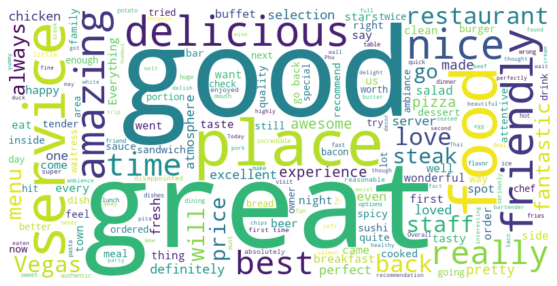

In [88]:
# postive reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

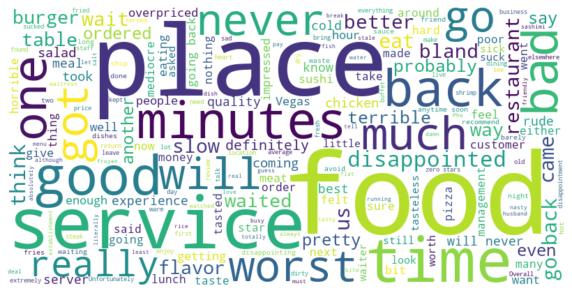

In [89]:
# negative reviews
w_c=df.loc[df['Liked']==0,:]
txt=' '.join([text for text in w_c['Review']])
wc=WordCloud(width=800, height=400,background_color='white').generate(txt)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9,min_df=10)
X=vectorizer.fit_transform(df['tokenized_Review']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df['tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)
x_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [92]:
train_vectorized=vectorizer.transform(x_train)
test_vectorized=vectorizer.transform(x_test)
x_train_array=train_vectorized.toarray()
x_test_array=test_vectorized.toarray()

In [93]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) 
rf.fit(x_train_array, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [94]:
y_train_pred=rf.predict(x_train_array)
y_test_pred=rf.predict(x_test_array)

In [95]:
pd.DataFrame({"actual_y_value":y_test, "predicted_y_value":y_test_pred})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,0
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [96]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report, confusion_matrix
def print_metrics(actual,predicted):
    print('Accuracy:', accuracy_score(actual,predicted))
    print('Precision:',precision_score(actual,predicted))
    print('Recall:', recall_score(actual,predicted))
    print('F1 score:', f1_score(actual,predicted))
    print('Confusion matrix:\n',confusion_matrix(actual,predicted))
    print('Classification report:\n', classification_report(actual,predicted))
print_metrics(y_train,y_train_pred)

Accuracy: 0.78375
Precision: 0.9518072289156626
Recall: 0.5954773869346733
F1 score: 0.7326120556414218
Confusion matrix:
 [[390  12]
 [161 237]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       402
           1       0.95      0.60      0.73       398

    accuracy                           0.78       800
   macro avg       0.83      0.78      0.78       800
weighted avg       0.83      0.78      0.78       800



In [97]:
print_metrics(y_test,y_test_pred)

Accuracy: 0.73
Precision: 0.875
Recall: 0.5490196078431373
F1 score: 0.674698795180723
Confusion matrix:
 [[90  8]
 [46 56]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.92      0.77        98
           1       0.88      0.55      0.67       102

    accuracy                           0.73       200
   macro avg       0.77      0.73      0.72       200
weighted avg       0.77      0.73      0.72       200



In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['tokenized_Review'], df['Liked'], random_state=107, test_size=0.2)

vectorizer = TfidfVectorizer()
train_vectorized = vectorizer.fit_transform(x_train)
test_vectorized = vectorizer.transform(x_test)

In [109]:
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)
logistic_reg.fit(train_vectorized, y_train)

y_train_pred = logistic_reg.predict(train_vectorized)
y_test_pred = logistic_reg.predict(test_vectorized)

In [110]:
print("Metrics for Training Data:")
print_metrics(y_train, y_train_pred)

Metrics for Training Data:
Accuracy: 0.77
Precision: 0.9083969465648855
Recall: 0.5979899497487438
F1 score: 0.7212121212121213
Confusion matrix:
 [[378  24]
 [160 238]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80       402
           1       0.91      0.60      0.72       398

    accuracy                           0.77       800
   macro avg       0.81      0.77      0.76       800
weighted avg       0.80      0.77      0.76       800



In [111]:
print("Metrics for Test Data:")
print_metrics(y_test, y_test_pred)

Metrics for Test Data:
Accuracy: 0.745
Precision: 0.8591549295774648
Recall: 0.5980392156862745
F1 score: 0.7052023121387284
Confusion matrix:
 [[88 10]
 [41 61]]
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        98
           1       0.86      0.60      0.71       102

    accuracy                           0.74       200
   macro avg       0.77      0.75      0.74       200
weighted avg       0.77      0.74      0.74       200



In [114]:
def predict_sentiment(review_text):
    review_vectorized = vectorizer.transform([review_text])
    
    sentiment = logistic_reg.predict(review_vectorized)
    
    if sentiment[0] == 0:
        return "Negative"
    else:
        return "Positive"

n=int(input("Enter the number of reviews you would like to analyze: "))
for i in range(n):
    custom_review = input()
    prediction = predict_sentiment(custom_review)
    print("Sentiment Prediction:", prediction)

Enter the number of reviews you would like to analyze: 3
the food was delicious!
Sentiment Prediction: Positive
food was cold and the waiting time was long
Sentiment Prediction: Negative
i did not expect such great service
Sentiment Prediction: Positive
